# Dataset

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rc('figure', facecolor = 'w', edgecolor ='w')

In [36]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [37]:
print("train data's shape : {}".format(df_train.shape))
print("test data's shape : {}".format(df_test.shape))

train data's shape : (114, 11)
test data's shape : (228, 10)


In [38]:
df_train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [39]:
df_test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [40]:
# id 제거
df_train.drop(['id'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

In [50]:
print('columns : {}'.format(len(df_train.columns)))
df_train.columns

columns : 10


Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [44]:
df_train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


## null data

In [45]:
# train data
print('Null Data Count\n')
for i,cnt in enumerate(df_train.isnull().sum()):
    if cnt > 0:
        print("{} : {}".format(df_train.columns[i],cnt))
        
print('\nNull Data Percent\n')
for i,per in enumerate(df_train.isnull().mean()):
    if per > 0:
        print("{} : {:.2f}%".format(df_train.columns[i],per*100))

Null Data Count

Sex : 3
Delta 15 N (o/oo) : 3
Delta 13 C (o/oo) : 3

Null Data Percent

Sex : 2.63%
Delta 15 N (o/oo) : 2.63%
Delta 13 C (o/oo) : 2.63%


In [46]:
# test data
print('Null Data Count\n')
for i,cnt in enumerate(df_test.isnull().sum()):
    if cnt > 0:
        print("{} : {}".format(df_test.columns[i],cnt))
        
print('\nNull Data Percent\n')
for i,per in enumerate(df_test.isnull().mean()):
    if per > 0:
        print("{} : {:.2f}%".format(df_test.columns[i],per*100))

Null Data Count

Sex : 6
Delta 15 N (o/oo) : 9
Delta 13 C (o/oo) : 8

Null Data Percent

Sex : 2.63%
Delta 15 N (o/oo) : 3.95%
Delta 13 C (o/oo) : 3.51%


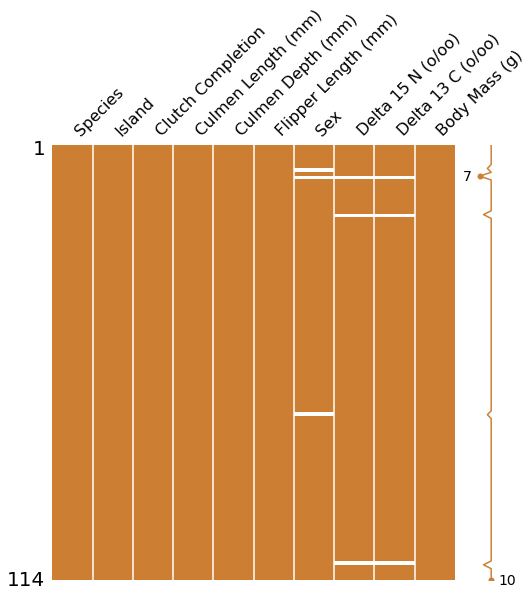

In [47]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

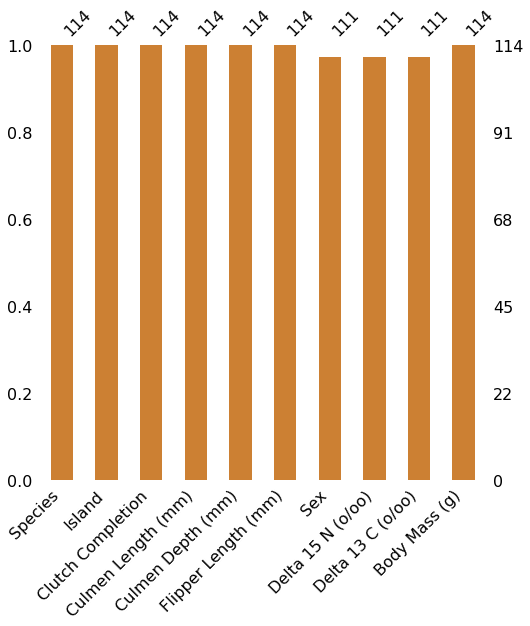

In [48]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

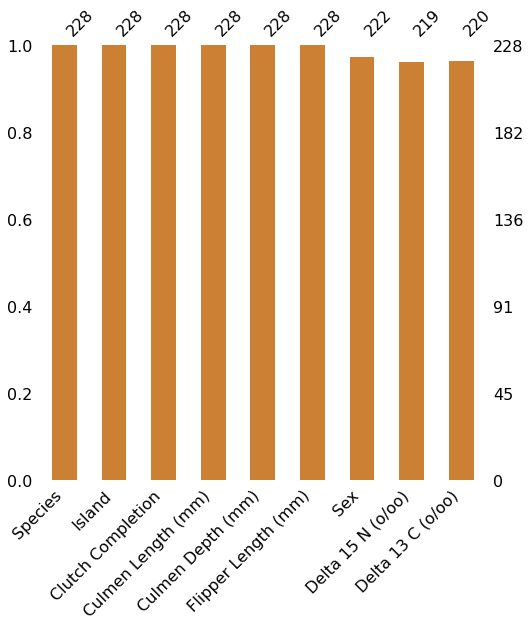

In [49]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

## Target

> Body Mass (g)
- 편향되어 보이지 않는다.

In [52]:
df_train['Body Mass (g)'].describe()

count     114.000000
mean     4327.850877
std       781.766484
min      2700.000000
25%      3675.000000
50%      4250.000000
75%      4850.000000
max      6300.000000
Name: Body Mass (g), dtype: float64

In [98]:
plt.legend?

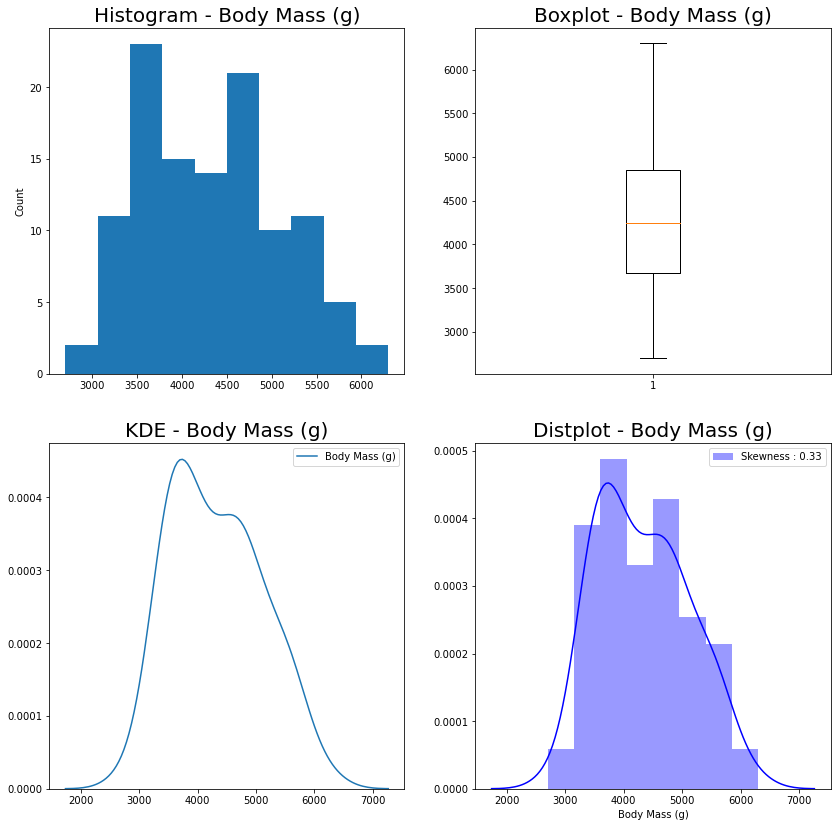

In [99]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.hist(df_train['Body Mass (g)'])
plt.title('Histogram - Body Mass (g)', fontdict={'fontsize':20})
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.boxplot(df_train['Body Mass (g)'])
plt.title('Boxplot - Body Mass (g)', fontdict={'fontsize':20})

plt.subplot(2,2,3)
sns.kdeplot(df_train['Body Mass (g)'])
plt.title('KDE - Body Mass (g)', fontdict={'fontsize':20})

plt.subplot(2,2,4)
sns.distplot(df_train['Body Mass (g)'],
                   color='b',
                   label='Skewness : {:.2f}'.format(df_train['Body Mass (g)'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Body Mass (g)', fontdict={'fontsize':20})

plt.show()

# EDA

In [74]:
df_train.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [106]:
numerical_feature =  df_train.columns[df_train.dtypes!=object][:-1] # Body Mass 제외
categorical_feature = df_train.columns[df_train.dtypes==object]

print('수치형 데이터 : {}'.format(list(numerical_feature)))
print('카테고리형 데이터 : {}'.format(list(categorical_feature)))

수치형 데이터 : ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
카테고리형 데이터 : ['Species', 'Island', 'Clutch Completion', 'Sex']


## Numerical Feature

In [116]:
numerical_feature

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

### Culmen Length (mm)

> 펭귄 옆모습 기준 부리의 가로 길이
- 편향되어있지 않음

In [90]:
df_train['Culmen Length (mm)'].describe()

count    114.000000
mean      44.613158
std        5.321829
min       33.500000
25%       40.325000
50%       45.200000
75%       49.075000
max       55.100000
Name: Culmen Length (mm), dtype: float64

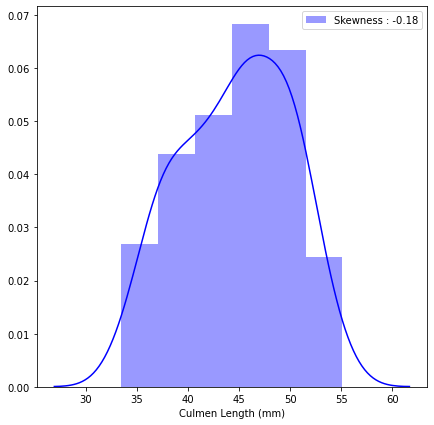

In [88]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
fig = sns.distplot(df_train['Culmen Length (mm)'],
                   color='b',
                   label='Skewness : {:.2f}'.format(df_train['Culmen Length (mm)'].skew()),
                   ax=ax)
fig = fig.legend(loc='best')

### Culmen Depth (mm)

> 펭귄 옆모습 기준 부리의 세로 길이
- 편향되어있지 않음

In [95]:
df_train['Culmen Depth (mm)'].describe()

count    114.000000
mean      17.014912
std        1.941363
min       13.200000
25%       15.225000
50%       17.250000
75%       18.600000
max       21.100000
Name: Culmen Depth (mm), dtype: float64

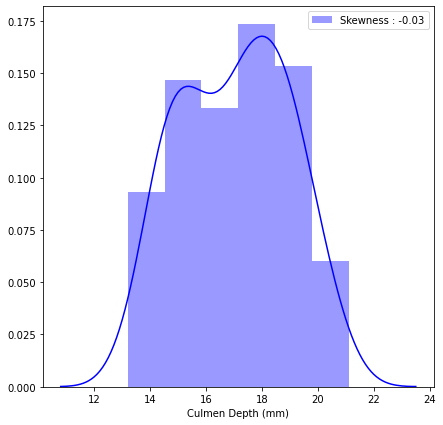

In [96]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
fig = sns.distplot(df_train['Culmen Depth (mm)'],
                   color='b',
                   label='Skewness : {:.2f}'.format(df_train['Culmen Depth (mm)'].skew()),
                   ax=ax)
fig = fig.legend(loc='best')

### Flipper Length (mm)

> 펭귄의 팔(날개) 길이
- 편향되어있지 않음

In [100]:
df_train['Flipper Length (mm)'].describe()

count    114.000000
mean     203.052632
std       14.653425
min      174.000000
25%      190.000000
50%      199.000000
75%      216.000000
max      231.000000
Name: Flipper Length (mm), dtype: float64

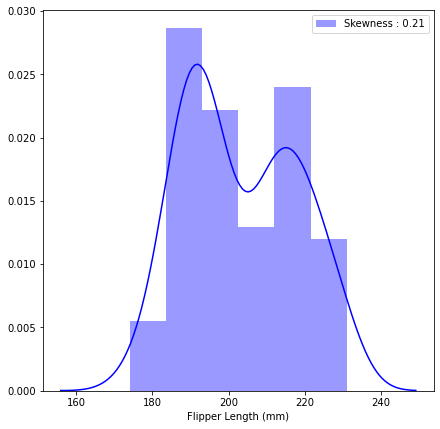

In [101]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
fig = sns.distplot(df_train['Flipper Length (mm)'],
                   color='b',
                   label='Skewness : {:.2f}'.format(df_train['Flipper Length (mm)'].skew()),
                   ax=ax)
fig = fig.legend(loc='best')

### Delta 15 N (o/oo)

> 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- 편향되어있지 않음

In [102]:
df_train['Delta 15 N (o/oo)'].describe()

count    111.000000
mean       8.737634
std        0.567698
min        7.632200
25%        8.272585
50%        8.632590
75%        9.264635
max       10.025440
Name: Delta 15 N (o/oo), dtype: float64

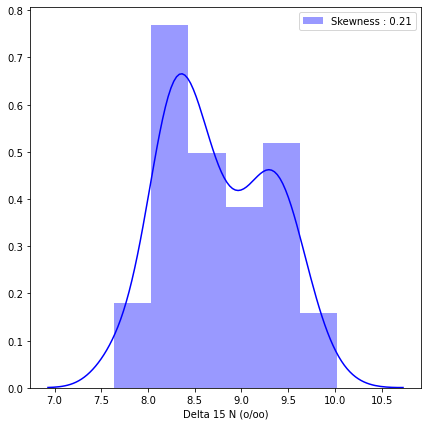

In [103]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
fig = sns.distplot(df_train['Delta 15 N (o/oo)'],
                   color='b',
                   label='Skewness : {:.2f}'.format(df_train['Delta 15 N (o/oo)'].skew()),
                   ax=ax)
fig = fig.legend(loc='best')

### Delta 13 C (o/oo)

> 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- 편향되어있지 않음

In [104]:
df_train['Delta 13 C (o/oo)'].describe()

count    111.000000
mean     -25.723051
std        0.859786
min      -27.018540
25%      -26.434025
50%      -25.955410
75%      -25.005945
max      -24.102550
Name: Delta 13 C (o/oo), dtype: float64

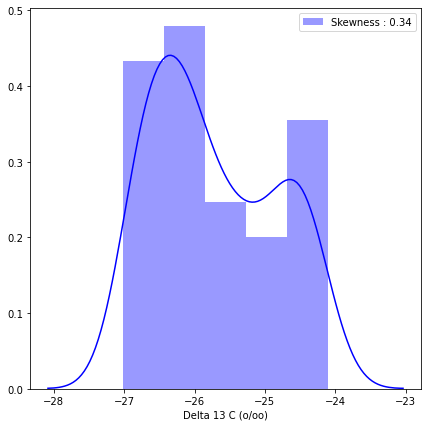

In [105]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
fig = sns.distplot(df_train['Delta 13 C (o/oo)'],
                   color='b',
                   label='Skewness : {:.2f}'.format(df_train['Delta 13 C (o/oo)'].skew()),
                   ax=ax)
fig = fig.legend(loc='best')

### With target

> 정보
- 두 무리로 나뉘는 Feature들이 있는 거 같기도 하다

In [107]:
numerical_feature

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

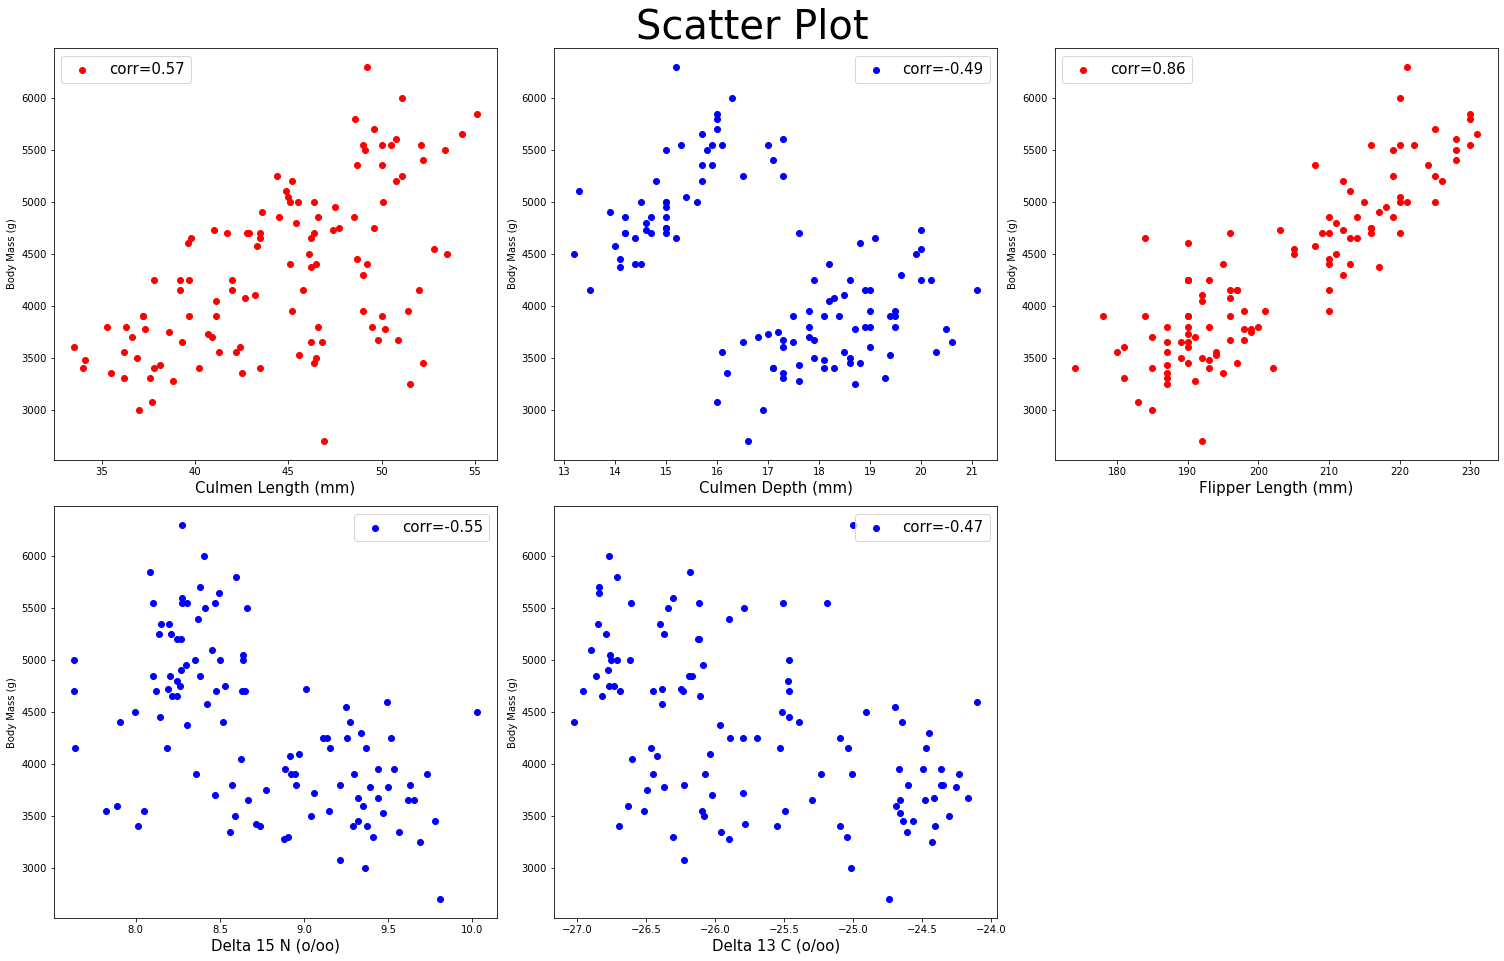

In [123]:
feature = numerical_feature
target = 'Body Mass (g)'

plt.figure(figsize=(21,14))
plt.suptitle("Scatter Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.xlabel(feature[i], fontsize=15)
    plt.ylabel(target)
    corr_score = df_train[[feature[i],target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score>0 else 'blue'
    plt.scatter(df_train[feature[i]], df_train[target], color=c, label='corr={}'.format(corr_score))
    plt.legend(fontsize=15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

## Categorical Feature

In [115]:
categorical_feature

Index(['Species', 'Island', 'Clutch Completion', 'Sex'], dtype='object')

### Species

> 펭귄의 종

In [118]:
df_train['Species'].unique()

array(['Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Adelie Penguin (Pygoscelis adeliae)'], dtype=object)

In [119]:
df_train['Species'].value_counts()

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

In [121]:
df_train[['Species', 'Body Mass (g)']].groupby(['Species'], as_index=True).describe()

Body Mass (g)               \
                                                  count         mean   
Species                                                                
Adelie Penguin (Pygoscelis adeliae)                41.0  3801.219512   
Chinstrap penguin (Pygoscelis antarctica)          25.0  3756.000000   
Gentoo penguin (Pygoscelis papua)                  48.0  5075.520833   

                                                                               \
                                                  std     min     25%     50%   
Species                                                                         
Adelie Penguin (Pygoscelis adeliae)        435.601281  3000.0  3475.0  3750.0   
Chinstrap penguin (Pygoscelis antarctica)  419.155898  2700.0  3500.0  3675.0   
Gentoo penguin (Pygoscelis papua)          481.036381  4150.0  4700.0  5000.0   

                                                           
                                              75%     max  
Species                                                    
Adelie Penguin (Pygoscelis adeliae)        4100.0  4725.0  
Chinstrap penguin (Pygoscelis antarctica)  3950.0  4550.0  
Gentoo penguin (Pygoscelis papua)          5500.0  6300.0

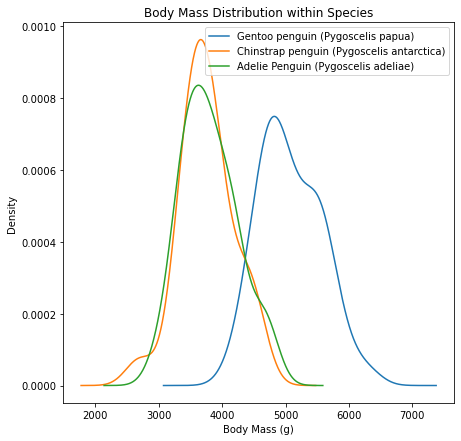

In [128]:
species = df_train['Species'].unique()

plt.figure(figsize=(7,7))
df_train['Body Mass (g)'][df_train["Species"] == species[0]].plot(kind='kde')
df_train['Body Mass (g)'][df_train["Species"] == species[1]].plot(kind='kde')
df_train['Body Mass (g)'][df_train["Species"] == species[2]].plot(kind='kde')

plt.xlabel("Body Mass (g)")
plt.title('Body Mass Distribution within Species')
plt.legend(species)

plt.show()

### Island

> 샘플들이 수집된 Palmer Station 근처 섬 이름

In [129]:
df_train['Island'].unique()

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [130]:
df_train['Island'].value_counts()

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [131]:
df_train[['Island', 'Body Mass (g)']].groupby(['Island'], as_index=True).describe()

Body Mass (g)                                                   \
                  count         mean         std     min     25%     50%   
Island                                                                     
Biscoe             57.0  4878.947368  664.145354  3075.0  4575.0  4850.0   
Dream              44.0  3764.772727  432.183416  2700.0  3450.0  3700.0   
Torgersen          13.0  3817.307692  373.940812  3275.0  3600.0  3700.0   

                           
              75%     max  
Island                     
Biscoe     5350.0  6300.0  
Dream      3987.5  4650.0  
Torgersen  3900.0  4700.0

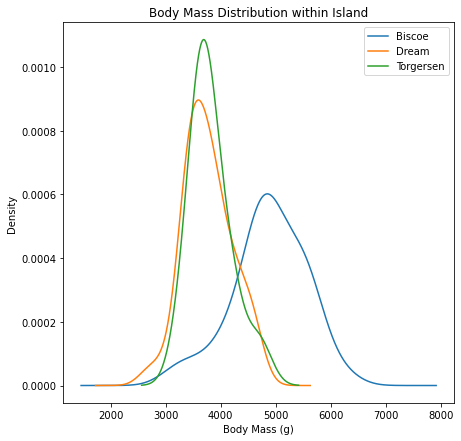

In [132]:
island = df_train['Island'].unique()

plt.figure(figsize=(7,7))
df_train['Body Mass (g)'][df_train["Island"] == island[0]].plot(kind='kde')
df_train['Body Mass (g)'][df_train["Island"] == island[1]].plot(kind='kde')
df_train['Body Mass (g)'][df_train["Island"] == island[2]].plot(kind='kde')

plt.xlabel("Body Mass (g)")
plt.title('Body Mass Distribution within Island')
plt.legend(island)

plt.show()

### Species and Island

> 정보
- Biscoe 섬의 Gentoo penguin (Pygoscelis papua)종이 혼자 평균이 다름

In [133]:
df_train[['Species','Island', 'Body Mass (g)']].groupby(['Island', 'Species'], as_index=True).describe()

Body Mass (g)  \
                                                            count   
Island    Species                                                   
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 9.0   
          Gentoo penguin (Pygoscelis papua)                  48.0   
Dream     Adelie Penguin (Pygoscelis adeliae)                19.0   
          Chinstrap penguin (Pygoscelis antarctica)          25.0   
Torgersen Adelie Penguin (Pygoscelis adeliae)                13.0   

                                                                              \
                                                            mean         std   
Island    Species                                                              
Biscoe    Adelie Penguin (Pygoscelis adeliae)        3830.555556  509.714653   
          Gentoo penguin (Pygoscelis papua)          5075.520833  481.036381   
Dream     Adelie Penguin (Pygoscelis adeliae)        3776.315789  460.108206   
          Chinstrap penguin (Pygoscelis antarctica)  3756.000000  419.155898   
Torgersen Adelie Penguin (Pygoscelis adeliae)        3817.307692  373.940812   

                                                                             \
                                                        min     25%     50%   
Island    Species                                                             
Biscoe    Adelie Penguin (Pygoscelis adeliae)        3075.0  3400.0  3800.0   
          Gentoo penguin (Pygoscelis papua)          4150.0  4700.0  5000.0   
Dream     Adelie Penguin (Pygoscelis adeliae)        3000.0  3412.5  3725.0   
          Chinstrap penguin (Pygoscelis antarctica)  2700.0  3500.0  3675.0   
Torgersen Adelie Penguin (Pygoscelis adeliae)        3275.0  3600.0  3700.0   

                                                                     
                                                        75%     max  
Island    Species                                                    
Biscoe    Adelie Penguin (Pygoscelis adeliae)        4075.0  4725.0  
          Gentoo penguin (Pygoscelis papua)          5500.0  6300.0  
Dream     Adelie Penguin (Pygoscelis adeliae)        4125.0  4650.0  
          Chinstrap penguin (Pygoscelis antarctica)  3950.0  4550.0  
Torgersen Adelie Penguin (Pygoscelis adeliae)        3900.0  4700.0

In [139]:
for i in range(3):
    print(species[i])

Gentoo penguin (Pygoscelis papua)
Chinstrap penguin (Pygoscelis antarctica)
Adelie Penguin (Pygoscelis adeliae)


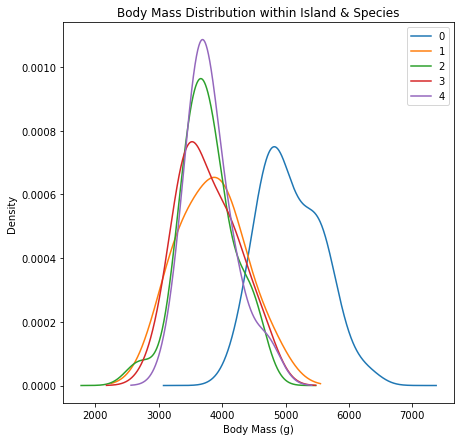

In [138]:
species = df_train['Species'].unique()
island = df_train['Island'].unique()

plt.figure(figsize=(7,7))
df_train['Body Mass (g)'][(df_train["Island"] == "Biscoe") & (df_train['Species'] == species[0])].plot(kind='kde')
df_train['Body Mass (g)'][(df_train["Island"] == "Biscoe") & (df_train['Species'] == species[2])].plot(kind='kde')
df_train['Body Mass (g)'][(df_train["Island"] == "Dream") & (df_train['Species'] == species[1])] .plot(kind='kde')
df_train['Body Mass (g)'][(df_train["Island"] == "Dream") & (df_train['Species'] == species[2])] .plot(kind='kde')
df_train['Body Mass (g)'][(df_train["Island"] == "Torgersen") & (df_train['Species'] == species[2])].plot(kind='kde')

plt.xlabel("Body Mass (g)")
plt.title('Body Mass Distribution within Island & Species')
plt.legend(range(5))

plt.show()

### Clutch Completion

> 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- 90%가 Yes
- 삭제해도 될 듯?? -> 다른 Feature들이랑 관계보고 결정하자

In [142]:
df_train['Clutch Completion'].value_counts()

Yes    102
No      12
Name: Clutch Completion, dtype: int64

In [145]:
print("Yes의 비율 : {:.2f}".format(df_train['Clutch Completion'].map({'Yes':1, 'No':0}).mean()*100))

Yes의 비율 : 89.47


### Sex

> 펭귄의 성별
- Male의 평균이 좀 더 크다

In [147]:
df_train['Sex'].value_counts()

MALE      56
FEMALE    55
Name: Sex, dtype: int64

In [148]:
df_train[['Sex', 'Body Mass (g)']].groupby(['Sex'], as_index=True).describe()

Body Mass (g)                                                           \
               count         mean         std     min     25%     50%     75%   
Sex                                                                             
FEMALE          55.0  4000.909091  654.877774  2700.0  3475.0  3750.0  4700.0   
MALE            56.0  4659.821429  774.767980  3250.0  3950.0  4575.0  5362.5   

                
           max  
Sex             
FEMALE  5200.0  
MALE    6300.0

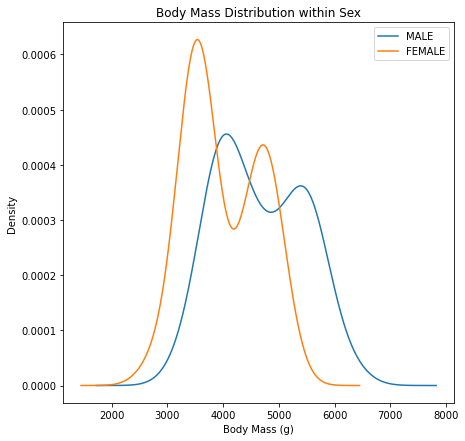

In [149]:
sex = df_train['Sex'].unique()

plt.figure(figsize=(7,7))
df_train['Body Mass (g)'][df_train["Sex"] == sex[0]].plot(kind='kde')
df_train['Body Mass (g)'][df_train["Sex"] == sex[1]].plot(kind='kde')

plt.xlabel("Body Mass (g)")
plt.title('Body Mass Distribution within Sex')
plt.legend(sex)

plt.show()